In [ ]:
# =========================================
# MANCOVA with multiple covariates
# Dataset: adult_combined.xlsx
# =========================================

# --- STEP 1: Upload the Excel file ---
from google.colab import files
uploaded = files.upload()

In [1]:
# --- STEP 2: Install and import required libraries ---
!pip install pingouin seaborn matplotlib --quiet
import pandas as pd
import pingouin as pg
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.multivariate.manova import MANOVA

In [2]:
# --- STEP 3: Read and view the Excel file ---

df = pd.read_excel('adult_combined.xlsx')  # make sure the filename matches
print("Data loaded successfully!")
print(df.head())

Data loaded successfully!
   age         workclass  fnlwgt  education  education_num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital_status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital_gain  capital_loss  hours_per_week native_country income  
0          2174             0              40  United-States  <=50K  
1             0 

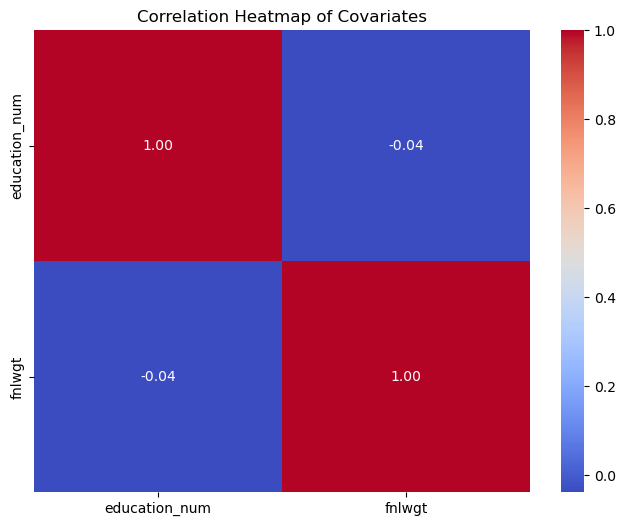

In [3]:
# --- STEP 4: Visualize covariates using a heatmap ---
covariates = ['education_num', 'fnlwgt']
plt.figure(figsize=(8,6))
sns.heatmap(df[covariates].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap of Covariates")
plt.show()

In [4]:

# --- STEP 5: Split data into train/test if needed (optional) ---
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

In [5]:

# --- STEP 7: PERFORM MANCOVA ---
# Define dependent variables and covariates in formula
# Example: Dependent Variables = age + hours_per_week +  capital_gain + capital_loss
# Independet Variables = sex
# Covariates = education_num + fnlwgt
formula = 'age + hours_per_week +  capital_gain + capital_loss ~ sex + education_num + fnlwgt'

# Fit MANOVA
maov = MANOVA.from_formula(formula, data=train_df)
print("\nMANCOVA Results:")
print(maov.mv_test())


MANCOVA Results:
                    Multivariate linear model
                                                                 
-----------------------------------------------------------------
       Intercept        Value  Num DF   Den DF    F Value  Pr > F
-----------------------------------------------------------------
          Wilks' lambda 0.6125 4.0000 34182.0000 5406.0506 0.0000
         Pillai's trace 0.3875 4.0000 34182.0000 5406.0506 0.0000
 Hotelling-Lawley trace 0.6326 4.0000 34182.0000 5406.0506 0.0000
    Roy's greatest root 0.6326 4.0000 34182.0000 5406.0506 0.0000
-----------------------------------------------------------------
                                                                 
-----------------------------------------------------------------
           sex           Value  Num DF   Den DF   F Value  Pr > F
-----------------------------------------------------------------
           Wilks' lambda 0.9402 4.0000 34182.0000 543.1562 0.0000
          Pi

In [ ]:


# --- STEP 8: Post-hoc (if needed) ---
# Define your dependent variables and independent variable
DVs = ['age', 'hours_per_week', 'capital_gain', 'capital_loss']  # replace with your actual dependent variable column names
IV = 'sex'  # your independent variable
covariates = ['education_num', 'fnlwgt']  # your covariates

from pingouin import ancova
from statsmodels.stats.multicomp import pairwise_tukeyhsd

for dv in DVs:
    print(f"\nPost-hoc ANCOVA for {dv}:")

    # Run univariate ANCOVA
    ancova_res = pg.ancova(dv=dv, between=IV, covar=covariates, data=train_df)
    #print(ancova_res)

    # If ANCOVA is significant, run Tukey HSD
    if ancova_res['p-unc'][0] < 0.05:
        print(f"\nTukey HSD post-hoc for {dv}:")
        tukey = pairwise_tukeyhsd(endog=train_df[dv],
                                  groups=train_df[IV],
                                  alpha=0.05)
        print("\n", tukey.summary(), "\n")

#reject = true is when they are significantly different
#which means that the independent variable has a significant effect on the dependent variable after controlling for covariates


Post-hoc ANCOVA for age:

Tukey HSD post-hoc for age:

 Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
Female   Male   2.6184   0.0 2.3102 2.9267   True
------------------------------------------------- 


Post-hoc ANCOVA for hours_per_week:

Tukey HSD post-hoc for hours_per_week:

 Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper reject
------------------------------------------------
Female   Male   5.9548   0.0 5.6836 6.226   True
------------------------------------------------ 


Post-hoc ANCOVA for capital_gain:

Tukey HSD post-hoc for capital_gain:

  Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
Female   Male   745.23   0.0 579.4004 911.0596   True
----------------------------------------------------- 


Post-hoc ANC